In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [5]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"


In [7]:
filt_df = df.sort_values('SizeRank').head(4)
filt_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"


In [14]:
id_vars = filt_df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [15]:
long_df = pd.melt(filt_df, id_vars=id_vars, var_name='Date', value_name='Value')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [16]:
fmt = "%Y-%m-%d"
long_df['Date'] = pd.to_datetime(long_df['Date'], format=fmt)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [17]:
long_df = long_df.set_index('Date')
long_df.head(8)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"255,517.00"
2000-02-29,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,401.00"
2000-02-29,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,079.00"
2000-02-29,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,536.00"


In [18]:
long_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [20]:
long_df['RegionName'].unique()

array(['New York', 'Los Angeles', 'Houston', 'Chicago'], dtype=object)

In [28]:
ts = long_df.groupby('RegionName').resample('MS').last()['Value']
ts

RegionName  Date      
Chicago     2000-01-01   166,139.00
            2000-02-01   166,536.00
            2000-03-01   167,368.00
            2000-04-01   168,826.00
            2000-05-01   170,499.00
                            ...    
New York    2022-05-01   768,797.00
            2022-06-01   773,944.00
            2022-07-01   777,692.00
            2022-08-01   779,960.00
            2022-09-01   781,622.00
Name: Value, Length: 1092, dtype: float64

In [29]:
type(ts)

pandas.core.series.Series

In [30]:
ts.index

MultiIndex([( 'Chicago', '2000-01-01'),
            ( 'Chicago', '2000-02-01'),
            ( 'Chicago', '2000-03-01'),
            ( 'Chicago', '2000-04-01'),
            ( 'Chicago', '2000-05-01'),
            ( 'Chicago', '2000-06-01'),
            ( 'Chicago', '2000-07-01'),
            ( 'Chicago', '2000-08-01'),
            ( 'Chicago', '2000-09-01'),
            ( 'Chicago', '2000-10-01'),
            ...
            ('New York', '2021-12-01'),
            ('New York', '2022-01-01'),
            ('New York', '2022-02-01'),
            ('New York', '2022-03-01'),
            ('New York', '2022-04-01'),
            ('New York', '2022-05-01'),
            ('New York', '2022-06-01'),
            ('New York', '2022-07-01'),
            ('New York', '2022-08-01'),
            ('New York', '2022-09-01')],
           names=['RegionName', 'Date'], length=1092)

In [31]:
df_unstacked = ts.unstack(0)
df_unstacked.head()


RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,"166,139.00","109,068.00","234,181.00","253,690.00"
2000-02-01,"166,536.00","109,079.00","234,401.00","255,517.00"
2000-03-01,"167,368.00","108,878.00","235,513.00","257,207.00"
2000-04-01,"168,826.00","108,881.00","237,589.00","260,310.00"
2000-05-01,"170,499.00","108,834.00","240,113.00","263,204.00"


In [36]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)


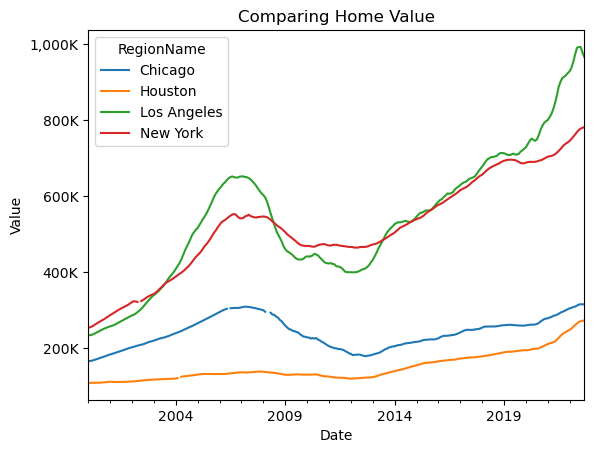

In [41]:
ax = df_unstacked.plot(ylabel='Value', title='Comparing Home Value')

ax.yaxis.set_major_formatter(fmt_thous)

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [48]:
df_q1 = df_unstacked.loc['2008-12']
df_q1

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-01,"265,306.00","131,283.00","469,294.00","510,309.00"


- The city that has the highest typical home value at the end of 2008 is New York
- Houston has the lowest home value

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [44]:
df_q2 = df_unstacked.loc['2008-11':'2008-12']
df_q2

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,"271,059.00","132,247.00","481,905.00","514,767.00"
2008-12-01,"265,306.00","131,283.00","469,294.00","510,309.00"


In [46]:
df_q2.diff()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,NaN,NaN,NaN,NaN
2008-12-01,"-5,753.00",-964.00,"-12,611.00","-4,458.00"


- Chicago's home value went down 5,753 dollars
- Houston's home value went down 964 dollars
- Los Angeles's home value went down 12,611 dollars
- New Yorks's home value went down 4,458 dollars